# EDA worksheet

####Reading Data set

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dress_attr_df = pd.read_csv('Attribute+DataSet.csv')
dress_sales_df = pd.read_csv('Dress+Sales.csv')

In [71]:
#Explore data set
dress_attr_df

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,acrylic,chiffon,NaN,striped,0
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,NaN,solid,1
476,532874347,Casual,Average,4.7,M,Summer,v-neck,full,cotton,NaN,lace,solid,1
477,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,silk,broadcloth,applique,print,1


####Question 1:
Check Price attribute

In [72]:
dress_attr_df["Price"].describe()

count         477
unique          5
top       Average
freq          240
Name: Price, dtype: object

In [73]:
dress_attr_df["Price"].value_counts()

Average      240
Low          165
Medium        30
High          21
very-high     21
Name: Price, dtype: int64

As seen from the output of describe command dtype is object and by doing value_counts the values can be Low, Average, Medium, High, Very-High which have a order in them. So the data is categorical and Ordinal. For more information refer to below link:
https://www.saedsayad.com/categorical_variables.htm#:~:text=There%20are%20two%20types%20of,variable%20has%20a%20clear%20ordering.

####Question 2:
There is another column in the 'Attribute Dataset' named 'Recommendation'; choose the correct statement for its data type and variable type from those given below.

Check 'Recommendation' attribute

In [74]:
dress_attr_df["Recommendation"].describe()

count    479.000000
mean       0.427975
std        0.495302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Recommendation, dtype: float64

In [75]:
dress_attr_df["Recommendation"]

0      1
1      0
2      0
3      1
4      0
      ..
474    0
475    1
476    1
477    1
478    0
Name: Recommendation, Length: 479, dtype: int64

In [76]:
dress_attr_df["Recommendation"].value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

As mentioned in text, the field contains either 0 or 1. 0 meaning No and 1 meaning Yes. So the data looks categorical and as confirmed from describe and value_counts commands the data type is int. So it can be considered as Integer type and categorical.

######Feedback
Answer is correct, but a handy command to check dtype of dataset is info

In [77]:
dress_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


####Question 3:
Which of the following column do you think are of no use in “Attribute DataSet”.
All the columns look important initially, Dress id seems not important but this might be required to join or merge to get sales data. So my answer would be None of these.

######Feedback
Answer is correct

####Question 4:
As you can see, there is a column in the Attribute Dataset named 'Size’. This column contains the values in an abbreviated format. Write a code in Python to convert the following:

M into “Medium”

L into “Large”

XL into “Extra large”

Free into “Free”

S, s and small into “Small”

Once you are done with the changes in the dataset, calculate the value of the lowest percentage, the highest percentage and the percentage of 'Small' size categories in the column named 'Size', respectively.



Check the values in Size column of the dataset.

In [84]:
dress_attr_df["Size"].value_counts()

M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: Size, dtype: int64

Define function to make the conversion

In [85]:
def getProperSizeLabels(x):
  if x.upper() == "M":
    return "Medium"
  elif x.upper() == "L":
    return "Large"
  elif x.upper() == "XL":
    return "Extra large"
  elif x.upper() == "FREE":
    return "Free"
  elif x.upper() == "SMALL" or x.upper() == "S":
    return "Small"


In [86]:
#create a copy to keep original data set safe
attr = dress_attr_df.copy()

In [87]:
attr["Size"] = attr["Size"].apply(lambda x: getProperSizeLabels(x))

In [88]:
#Get percentage
attr["Size"].value_counts(normalize=True)

Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra large    0.029228
Name: Size, dtype: float64

So the lowest percentage is 2.92
highest percentage is 35.69
Percentage of small size is 7.51

######Feedback
Answer is correct
But solution suggested is given below

In [89]:
attr.Size= attr.Size.replace(['S', 'small', 's'], "Small")

attr.Size= attr.Size.replace('free', "Free")

attr.Size= attr.Size.replace('M', "Medium")

attr.Size= attr.Size.replace('L', "Large") 

attr.Size= attr.Size.replace('XL', "Extra large")

attr.Size.value_counts(normalize=True)


Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra large    0.029228
Name: Size, dtype: float64

####Question 5:
Impute/Remove Missing Values
You are given another dataset named 'Dress Sales Dataset'. Now, if you observe the data types of the columns using the ‘inp1.info()’ command, you will see that there are certain columns defined as object data type, although they primarily consist of numeric data.

Now, if you try and convert these object data type columns into numeric data type (float), you will come across an error message. From the options given below, choose the correct option with the reason for the error and also how to remove this error.

Check the sales dataset

In [90]:
dress_sales_df.head(10)

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736
5,1.068332e+09,4,5,11,13,13,13,16,18,19,...,25,25.0,26,26.0,26.0,26.0,27,27.0,27.0,27
6,1.220707e+09,45,61,131,165,176,209,216,251,262,...,379,400.0,417,424.0,445.0,462.0,474,494.0,503.0,552
7,1.219677e+09,4,13,55,73,76,89,94,117,121,...,160,165.0,169,172.0,196.0,212.0,224,241.0,252.0,263
8,1.113094e+09,5,6,10,12,13,15,16,17,17,...,27,28.0,29,29.0,29.0,29.0,29,29.0,29.0,33
9,9.852927e+08,9,11,12,12,12,12,12,13,13,...,14,14.0,14,14.0,14.0,14.0,14,14.0,14.0,14


In [91]:
dress_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [92]:
#define a function to check if field is numeric
def isNotANumber(x):
  try:
    float(x)
    return False
  except ValueError:
    return True

In [93]:
dress_sales_df[dress_sales_df["16-09-2013"].apply(lambda x: isNotANumber(x))]


,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
263,1.090993e+09,0,0,0,62,64,77,81,Removed,removed,...,703,NaN,753,NaN,NaN,NaN,956,NaN,NaN,1043


In [94]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
#define a function to conver field to numeric or null
def convertFloat(x):
  try:
    return float(x)
  except ValueError:
    return None

In [95]:
df2 = dress_sales_df.copy()
df2[["09-12-2013","14-09-2013","16-09-2013","18-09-2013","20-09-2013","22-09-2013"]] = df2[["09-12-2013","14-09-2013","16-09-2013","18-09-2013","20-09-2013","22-09-2013"]].applymap(lambda x: convertFloat(x))
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

####Question 6:
When you observe the null counts in the 'Dress Sales Dataset' after performing all the operations that have been mentioned in the Jupyter Notebook, you will find that there are some columns in the 'Dress Sales' dataset where the number of missing values is more than 40%. Based on your understanding of dealing with missing values, select the most appropriate statement from those given below, with the reason.

In [96]:
#get null percentage of each column
df2.isnull().mean()*100

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
20-09-2013     0.208768
22-09-2013     0.208768
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [97]:
#Drop columns with more than 40% null values
df2.drop("26-09-2013", axis=1, inplace=True)
df2.drop("30-09-2013", axis=1, inplace=True)
df2.drop("10-02-2013", axis=1, inplace=True)
df2.drop("10-04-2013", axis=1, inplace=True)
df2.drop("10-08-2013", axis=1, inplace=True)
df2.drop("10-10-2013", axis=1, inplace=True)

In [98]:
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3706,3897,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,3258,3911,4277
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11,11,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1914,1952,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2252,2544,2736


######Feedback

The huge number of missing values in such columns is one of the criteria, but another major criterion is that these dates have extremely small sales values, and it is safe to remove them.

####Question 7:
You need to categorise the dates into seasons in the 'Dress Sales Dataset' data to simplify the analysis according to the following criteria:

June, July and August: Summer

September, October and November: Autumn

December, January and February: Winter

March, April and May: Spring

Which of the seasons has the lowest sales among all the seasons, and what is its value?

In [99]:
#Creating Columns as mentioned in question
df2["Summer"] = df2["29-08-2013"] + df2["31-08-2013"] + df2["09-06-2013"] + df2["09-08-2013"] + df2["10-06-2013"]
df2["Autumn"] = df2["09-10-2013"] + df2["14-09-2013"] + df2["16-09-2013"] + df2["18-09-2013"] + df2["20-09-2013"] + df2["22-09-2013"] + df2["24-09-2013"] + df2["28-09-2013"]
df2["Winter"] = df2["09-02-2013"] + df2["09-12-2013"] + df2["10-12-2013"]
df2["Spring"] = df2["09-04-2013"]


In [100]:
df2[["Summer","Autumn","Winter","Spring"]].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

######Feedback
Answer is correct
Other way to solve:

In [ ]:
df2['Spring'] = df2.apply(lambda x: x['09-04-2013'], axis=1)

df2['Summer'] = df2.apply(lambda x: x['29-08-2013'] + x['31-08-2013']+ x['09-06-2013']+ x['09-08-2013']+ x['10-06-2013'], axis=1)

df2['Winter'] = df2.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

df2['Autumn'] = df2.apply(lambda x: x['09-10-2013'] + x['14-09-2013']+ x['16-09-2013']+ x['18-09-2013']+ x['20-09-2013']+ x['22-09-2013']+ x['24-09-2013']+ x['28-09-2013'], axis=1)

####Question 8
You can see that there are two types of variables: One with a large number of missing values and another with a less number of missing values. These two columns can be categorised as follows:

Type-1: Missing values are extremely less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn

Type-2: Missing values are large in number (more than 15%): Material, FabricType, Decoration and Pattern Type

Based on your understanding, which is the best method to deal with the missing values in the Type-1 and Type-2 columns?



In my opinion, general approach would be to delete rows with type-1 data as it is very less percentage and impute data with type-2 data.

But let's first analyze data mentioned in dataframe to make a view of what should be done.

Question does not seem to clearly state that its talking about deleting columns or rows. Assuming question is talking about deleting such rows.

In [101]:
attr.isnull().mean()*100

Dress_ID           0.000000
Style              0.000000
Price              0.417537
Rating             0.000000
Size               0.000000
Season             0.417537
NeckLine           0.626305
SleeveLength       0.417537
Material          24.843424
FabricType        53.444676
Decoration        46.764092
Pattern Type      21.294363
Recommendation     0.000000
dtype: float64

As we can see Type2 data cannot be removed as it would result in deleting at least 53% of data. So option 1 is wrong.


In [102]:
attr[attr["FabricType"].isnull()]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.0,Medium,Summer,v-neck,sleevless,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.0,Extra large,Summer,o-neck,full,cotton,NaN,NaN,solid,0
10,898481530,Flare,Average,0.0,Free,Spring,v-neck,short,nylon,NaN,NaN,animal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,692445545,Casual,Low,4.4,Free,Summer,o-neck,full,cotton,NaN,NaN,solid,1
469,1190558632,cute,Average,0.0,Large,Summer,o-neck,sleevless,cotton,NaN,lace,solid,1
471,964917582,Casual,Average,5.0,Large,Summer,o-neck,sleevless,cotton,NaN,NaN,NaN,1
475,713391965,Casual,Low,4.7,Medium,Spring,o-neck,full,polyster,NaN,NaN,solid,1


To be on safe side we can go with option 2 of creating Missing Category for both type of data.
We can also remove the rows with more than 2 columns missing but this option is not there in question.
There is a confusion in option2 or option3. Going with option 2 for now.

#####Feedback
Wrong, should have gone with option 3.

In [103]:
attr = attr[~attr.Price.isnull()]
attr = attr[~attr.Season.isnull()]
attr = attr[~attr.NeckLine.isnull()]
attr = attr[~attr.SleeveLength.isnull()]
df2 = df2[~df2.Winter.isnull()]
df2 = df2[~df2.Autumn.isnull()]

attr.Material= attr.Material.replace(np.nan, "Missing")
attr.FabricType= attr.FabricType.replace(np.nan, "Missing")
attr.Decoration= attr.Decoration.replace(np.nan, "Missing")
attr['Pattern Type']= attr['Pattern Type'].replace(np.nan, "Missing")

####Question 9:
In the given dataset, there are certain discrepancies with the categorical names, such as irregular spellings. Choose the correct option of columns with irregular categories and update them.



Checking the columns mentioned.

In [104]:
attr["Season"].value_counts()

Summer    151
Spring    116
Winter     93
Automn     59
winter     44
Autumn      7
spring      2
Name: Season, dtype: int64

In [105]:
attr["SleeveLength"].value_counts()

sleevless         213
full               92
short              92
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
sleeevless          2
cap-sleeves         2
urndowncollor       1
half                1
turndowncollor      1
threequater         1
Petal               1
butterfly           1
sleveless           1
Name: SleeveLength, dtype: int64

In [106]:
attr["Style"].value_counts()

Casual      217
Sexy         65
party        48
cute         43
vintage      25
bohemian     23
Brief        17
work         17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

As seen from the output of command above, Season and SleeveLength columns need standardisation correction because case and misspelling.

#####Feedback
Correct

In [107]:
attr.Season= attr.Season.replace('Automn', "Autumn")
attr.Season= attr.Season.replace('spring', "Spring")
attr.Season= attr.Season.replace('winter', "Winter")

attr.SleeveLength= attr.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")
attr.SleeveLength= attr.SleeveLength.replace('full', "full sleeves")
attr.SleeveLength= attr.SleeveLength.replace(['half','halfsleeve'], "half sleeves")
attr.SleeveLength= attr.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")
attr.SleeveLength= attr.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")
attr.SleeveLength= attr.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

##Univariate Analysis

####Question 1
In the ‘Dress Attribute Dataset’, there is a column named ‘Style’, which contains the different style categories of women's apparel. Certain categories whose total sales is less than 50,000 across all the seasons are grouped under a single category named ‘Others’.

Which of the following categories under the ‘Style’ column can be grouped in the ‘Others’ category? Perform the grouping operation in the Notebook for further analysis.

Note: More than one option can be correct.

In [108]:
attr.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


We don't have sales information in dress_attribute data set, but sales data is available in dress sales dataset. We can join the two dataset on the basis of dress_id and then get sum of sales based on style column.

In [109]:
df2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [110]:
result = pd.merge(attr,df2,on=["Dress_ID"])
groupedResult = result[["Style","Summer","Autumn","Winter","Spring"]].groupby(by="Style").sum()
groupedResult["Total"] = groupedResult["Summer"]+groupedResult["Autumn"]+groupedResult["Winter"]+groupedResult["Spring"]
groupedResult[groupedResult["Total"] <= 50000]

,Summer,Autumn,Winter,Spring,Total
Style,,,,,
Flare,451,1161.0,406.0,71,2089.0
Novelty,2866,7353.0,2504.0,563,13286.0
OL,63,158.0,53.0,15,289.0
fashion,91,211.0,74.0,19,395.0


So the answer should contain Flare, Novelty, OL, fashion

In [120]:
groupedResult[groupedResult["Total"] <= 50000].index

Index(['Flare', 'Novelty', 'OL', 'fashion'], dtype='object', name='Style')

In [127]:
attr.replace(groupedResult[groupedResult["Total"] <= 50000].index,"Others", inplace=True)
attr["Style"].value_counts()

Casual      217
Sexy         65
party        48
cute         43
vintage      25
bohemian     23
Brief        17
work         17
Others       10
sexy          7
Name: Style, dtype: int64

#####Feedback
Answer is correct
Suggested approach to get the solution:

In [ ]:
total_collection=attr.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()

total_collection.sum(axis = 1)

In [ ]:
attr.replace(groupedResult[groupedResult["Total"] <= 50000].index,"Others", inplace=True)
attr["Style"].value_counts()


###Question 2:
What is the respective percentage of the 'Cute' and 'Others' categories in the 'Style' column in the 'Attribute Dataset'?

Need to get the percentage of Cute and Others categories

In [128]:
attr["Style"].value_counts(normalize=True) * 100

Casual      45.974576
Sexy        13.771186
party       10.169492
cute         9.110169
vintage      5.296610
bohemian     4.872881
Brief        3.601695
work         3.601695
Others       2.118644
sexy         1.483051
Name: Style, dtype: float64

So the answer would be 9,2.1

#####Summary
Answer is correct
Suggeted was to plot a graph

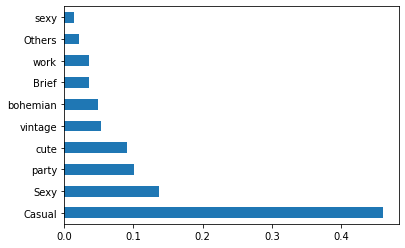

In [131]:
attr["Style"].value_counts(normalize=True).plot.barh()
plt.show()

####Question 3
Which of the following is an unordered variable in the 'Attribute Dataset'?

In [132]:
attr.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


Price is ordered

Size is ordered

Season can also be considered as ordered, as they have sequence

but Style is not orderd

So I will select Style as unordered.

#####Feedback
Correct

####Question 4:
What is the approximate difference between the maximum value and the 75th percentile in the 'Autumn' column?

In [140]:
df2["Autumn"].describe()["max"] - df2["Autumn"].describe()["75%"]

52410.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


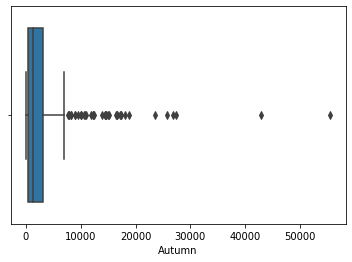

In [137]:
sns.boxplot(df2["Autumn"])

52410.0 which close to 52000

#####Feedback
Answer is correct

####Question 5:
Which of the following seasons shows the highest difference between the maximum value and the 99th quantile of sales?

In [145]:
def quantileDiff(dtfr,q1,q2):
  x = dtfr.quantile([q1,q2])
  return x[q2] - x[q1]


In [147]:
print(quantileDiff(df2["Winter"],0.9,1.0))
print(quantileDiff(df2["Summer"],0.9,1.0))
print(quantileDiff(df2["Spring"],0.9,1.0))
print(quantileDiff(df2["Autumn"],0.9,1.0))

18197.2
32376.199999999997
6637.2
49256.6


Autumn has maximum difference

#####Feedback
Answer is correct